<a href="https://colab.research.google.com/github/Akshay4729/Google-Apps/blob/main/Google_Apps_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libs**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Importing DataSet**

In [57]:
google = pd.read_csv('/content/Google Apps data.csv')

# **Feature Engineering**

In [59]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8276 non-null   int64  
 1   Unnamed: 0.1         8276 non-null   int64  
 2   App                  8276 non-null   object 
 3   Category             8276 non-null   object 
 4   Rating               8276 non-null   float64
 5   Reviews              8276 non-null   int64  
 6   Size                 8276 non-null   float64
 7   Installs             8276 non-null   int64  
 8   Type                 8276 non-null   object 
 9   Price                8276 non-null   float64
 10  Content Rating       7915 non-null   object 
 11  Last Updated         8276 non-null   object 
 12  Current Ver          8276 non-null   object 
 13  Minimum Android Ver  8276 non-null   object 
 14  Genres               8276 non-null   object 
dtypes: float64(3), int64(4), object(8)
mem

In [60]:
google.shape

(8276, 15)

In [61]:
google.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [62]:
google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Minimum Android Ver', 'Genres'],
      dtype='object')

In [63]:
google.index

RangeIndex(start=0, stop=8276, step=1)

In [64]:
google.isnull().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

In [65]:
google.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
5,Paper flowers instructions,Art And Design,4.4,167,5.6,50000,Free,0.0,Others,"March 26, 2017",1.0,2.3,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,Art And Design,3.8,178,19.0,50000,Free,0.0,Others,"April 26, 2018",1.1,4.0.3,Art & Design


# **Removing Null Values From Content Rating** 

In [66]:
Apps = google.dropna(axis=0)

In [67]:
Apps.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Minimum Android Ver    0
Genres                 0
dtype: int64

In [68]:
Apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7915 entries, 0 to 8275
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  7915 non-null   object 
 1   Category             7915 non-null   object 
 2   Rating               7915 non-null   float64
 3   Reviews              7915 non-null   int64  
 4   Size                 7915 non-null   float64
 5   Installs             7915 non-null   int64  
 6   Type                 7915 non-null   object 
 7   Price                7915 non-null   float64
 8   Content Rating       7915 non-null   object 
 9   Last Updated         7915 non-null   object 
 10  Current Ver          7915 non-null   object 
 11  Minimum Android Ver  7915 non-null   object 
 12  Genres               7915 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 865.7+ KB


In [69]:
Apps.shape

(7915, 13)

# **Analyzing Numerical Columns**

In [70]:
Apps.describe()

,Rating,Reviews,Size,Installs,Price
count,7915.000000,7.915000e+03,7915.000000,7.915000e+03,7915.000000
mean,4.177486,2.821057e+05,18.714311,9.790449e+06,1.063405
std,0.535871,2.133745e+06,22.239824,6.085541e+07,17.149233
min,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000
25%,4.000000,1.250000e+02,2.700000,1.000000e+04,0.000000
50%,4.300000,3.053000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,4.546750e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **Checking Numerical And Categorical Columns**

In [71]:
Apps.select_dtypes(include=[int,float]).head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


In [72]:
Apps.select_dtypes(include=[object]).head()

,App,Category,Type,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,Free,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,Free,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,Free,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,Art And Design,Free,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art And Design,Free,Others,"June 20, 2018",1.1,4.4,Art & Design


# **EDA**

# **Analyzing Each Numerical Columns**

1.   **Rating**

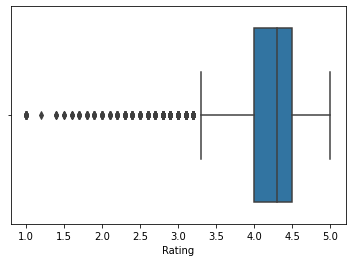

In [73]:
sns.boxplot(Apps['Rating'])

In [74]:
Apps['Rating'].describe()

count    7915.000000
mean        4.177486
std         0.535871
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

**Since we have a Rating between 0 to 5 So we can not change anything**


2.  **Size**

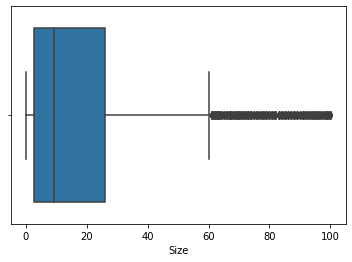

In [75]:
sns.boxplot(Apps['Size'])

In [76]:
Apps['Size'].describe()

count    7915.000000
mean       18.714311
std        22.239824
min         0.008300
25%         2.700000
50%         9.200000
75%        26.000000
max       100.000000
Name: Size, dtype: float64

**We have Size Range 0 to 100 So we convert In to Categorical data** 

In [77]:
size_new = []
for x in Apps['Size']:
  if(x>0 and x<=20):
    size_new.append('0-20')
  elif(x>=20 and x<=40):
    size_new.append('20-40')
  elif(x>=40 and x<=60):
    size_new.append('40-60')
  elif(x>=60 and x<=80):
    size_new.append('60-80')
  elif(x>=80 and x<=100):
    size_new.append('80-100')


In [78]:
Apps['Size_new'] = size_new
Apps['Size_new'].value_counts()

0-20      5359
20-40     1373
40-60      636
60-80      298
80-100     249
Name: Size_new, dtype: int64



3.   **Price**




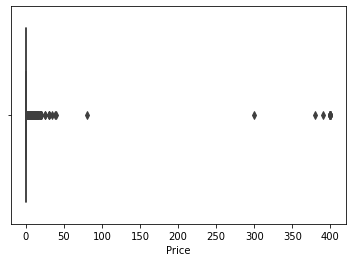

In [79]:
sns.boxplot(Apps['Price'])

In [80]:
Apps['Price'].describe()

count    7915.000000
mean        1.063405
std        17.149233
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

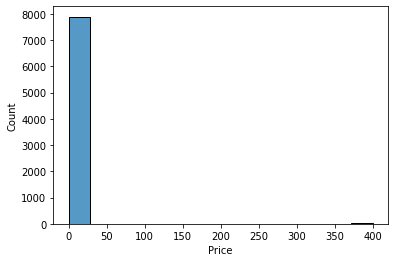

In [81]:
sns.histplot(Apps['Price'])

**We convert Price into Two Category Free Or Paid**

In [82]:
Price_new = []
for x in Apps['Price']:
  if x==0 :
    Price_new.append('Free')
  else:
    Price_new.append('Paid')

In [83]:
Apps['Price_new'] = Price_new
Apps['Price_new'].value_counts()

Free    7326
Paid     589
Name: Price_new, dtype: int64


4.   **Installs**

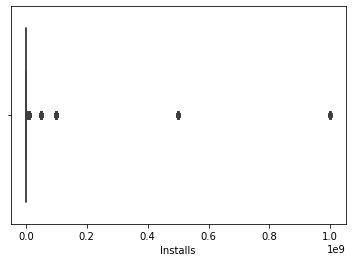

In [84]:
sns.boxplot(Apps['Installs'])

In [85]:
Apps['Installs'].describe()

count    7.915000e+03
mean     9.790449e+06
std      6.085541e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

**Since these columns contain large numbers so we convert them into abbreviation**

**we are installing numerize packager to convert a large number in to abbreviate form**

In [86]:
pip install numerize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from numerize import numerize

In [88]:
Install_new = []
for x in Apps['Installs']:
  Install_new.append(numerize.numerize(x))

In [89]:
Apps['Installs_new'] = Install_new
Apps['Installs_new'].value_counts()

1M      1358
100K    1041
10K      953
10M      909
1K       680
5M       594
500K     470
50K      438
5K       414
100      287
50M      204
100M     195
500      191
10        66
50        56
500M      26
1B        21
5          9
1          3
Name: Installs_new, dtype: int64

**5.  Reviews**

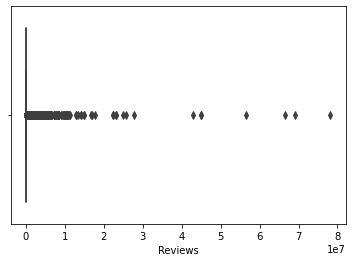

In [90]:
sns.boxplot(Apps['Reviews'])

In [91]:
Apps['Reviews'].describe()

count    7.915000e+03
mean     2.821057e+05
std      2.133745e+06
min      1.000000e+00
25%      1.250000e+02
50%      3.053000e+03
75%      4.546750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**Handling Outliers Using IQR**

In [92]:
Q1 , Q3  = np.percentile(Apps['Reviews'],[25 , 75]) 
 
IQR =  Q3 - Q1 

UP = Q3 + 1.5*IQR
low =  Q1 - 1.5*IQR
Outliers = []

for i in Apps['Reviews']:
  if(i<low or i>UP ):
    Outliers.append(i)

Apps['Reviews'] = [np.NaN if x in Outliers else x for x in Apps['Reviews']]
len(Apps['Reviews'])

7915

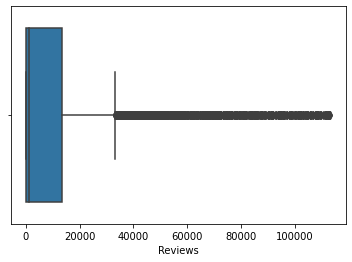

In [93]:
sns.boxplot(Apps['Reviews'])

In [94]:
Apps.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                1337
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Last Updated              0
Current Ver               0
Minimum Android Ver       0
Genres                    0
Size_new                  0
Price_new                 0
Installs_new              0
dtype: int64

**Removing Null Values**

In [95]:
Apps.dropna(axis=0,inplace=True)

In [96]:
Apps.isna().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Minimum Android Ver    0
Genres                 0
Size_new               0
Price_new              0
Installs_new           0
dtype: int64

In [97]:
Apps.shape

(6578, 16)

In [98]:
Apps['Reviews'].describe()

count      6578.000000
mean      12524.114168
std       23012.072365
min           1.000000
25%          70.000000
50%        1004.000000
75%       13256.750000
max      113183.000000
Name: Reviews, dtype: float64

**We are converting the Review value into the abbreviate form**

In [99]:
Reviews_new = []
for x in Apps['Reviews']:
  if(x>0 and x<=10999):
    Reviews_new.append('0-10K')
  elif(x>=11000 and x<=20999):
    Reviews_new.append('11K-20K')
  elif(x>=21000 and x<=30999):
    Reviews_new.append('21K-30K')
  elif(x>=31000 and x<=40999):
    Reviews_new.append('31K-40K')
  elif(x>=41000 and x<=50999):
    Reviews_new.append('41K-50K')
  elif(x>=51000 and x<=60999):
    Reviews_new.append('51K-60K')
  elif(x>=61000 and x<=70999):
    Reviews_new.append('61K-70K')
  elif(x>=71000 and x<=80999):
    Reviews_new.append('71K-80K')
  elif(x>=81000 and x<=90999):
    Reviews_new.append('81K-90K')
  elif(x>=91000 and x<=100999):
    Reviews_new.append('91K-100K')
  else:
    Reviews_new.append('More Than 100K')

In [100]:
Apps['Reviews_new'] = Reviews_new
Apps['Reviews_new'].value_counts()

0-10K             4803
11K-20K            470
21K-30K            331
31K-40K            240
41K-50K            184
51K-60K            128
61K-70K            118
71K-80K             90
More Than 100K      76
81K-90K             75
91K-100K            63
Name: Reviews_new, dtype: int64

# **Exploration**

**Histogram**



**1.   Reviews_new**

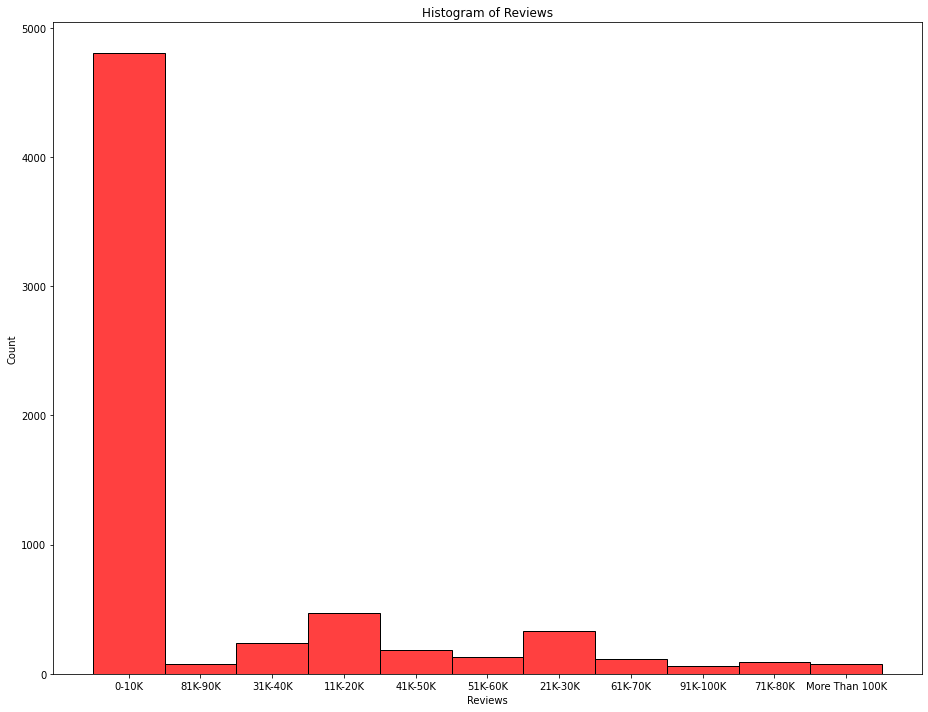

In [101]:
plt.figure(figsize = (13,10))
bins = np.arange(0,25,5)

sns.histplot(data = Apps ,x = 'Reviews_new',color = 'Red',bins = bins)

plt.title("Histogram of Reviews")                         
plt.xlabel('Reviews')                         
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**From this graph we can see how many apps are reviewed by users**


**2.   Rating**

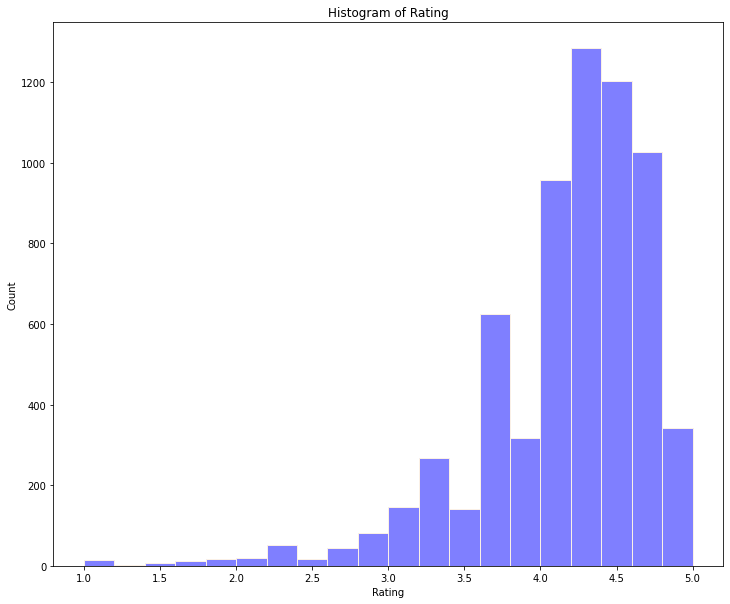

In [102]:
plt.figure(figsize = (12,10))


sns.histplot(data = Apps ,x = 'Rating', color = 'Blue', 
             edgecolor = 'linen', alpha = 0.5, bins = 20)

plt.title("Histogram of Rating")                         
plt.xlabel('Rating')                         
plt.ylabel('Count')
plt.show()

**From this graph, we can see the frequency distribution of Rating among apps**



**3.   App Size**




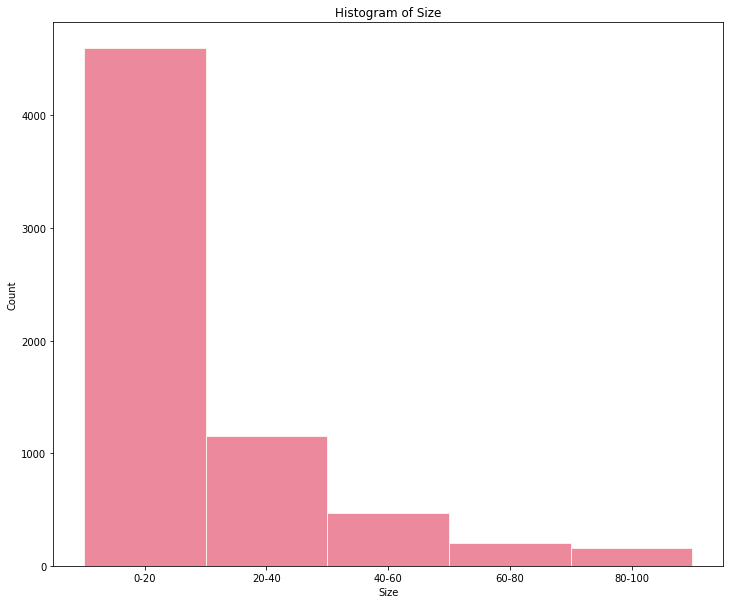

In [103]:
plt.figure(figsize = (12,10))

sns.histplot(data = Apps ,x = 'Size_new', color = 'crimson', 
             edgecolor = 'linen', alpha = 0.5, bins = 5)

plt.title("Histogram of Size")                         
plt.xlabel('Size')                         
plt.ylabel('Count')
plt.show()

**From this graph we can see how much app distribution amount diffrent range of app size** 



**4.   Price pie Chart** 



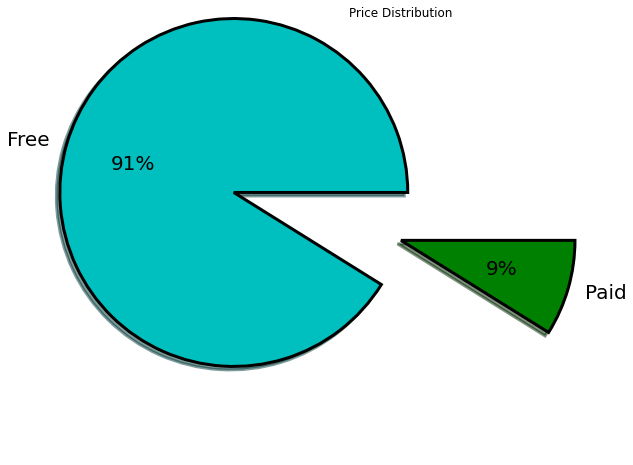

In [104]:
plt.figure(figsize = (10,8))

plt.pie(Apps['Price_new'].value_counts(),labels = Apps['Price_new'].unique(),
        autopct='%.0f%%',wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'},
        textprops = {'fontsize':20},colors = ['c','g'],shadow = True,explode =[1,0])

plt.title("Price Distribution")                         
plt.show()

**From This pie chart we can see how many apps are free or paid**





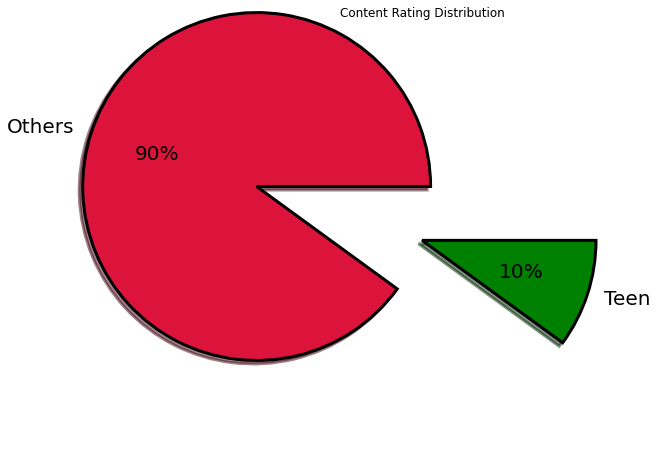

In [105]:
plt.figure(figsize = (10,8))

plt.pie(Apps['Content Rating'].value_counts(),labels = Apps['Content Rating'].unique() , 
        autopct='%.0f%%',wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'},
        textprops = {'fontsize':20},colors =['crimson','g'],shadow = True,explode =[1,0])

plt.title("Content Rating Distribution")                         
plt.show()

**From This pie chart we can see the Rating Distribution**




In [106]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres,Size_new,Price_new,Installs_new,Reviews_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design,0-20,Free,10K,0-10K
1,Coloring book moana,Art And Design,3.9,967.0,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design,0-20,Free,500K,0-10K
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design,0-20,Free,5M,81K-90K
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design,0-20,Free,100K,0-10K
5,Paper flowers instructions,Art And Design,4.4,167.0,5.6,50000,Free,0.0,Others,"March 26, 2017",1.0,2.3,Art & Design,0-20,Free,50K,0-10K


In [107]:
df1 = Apps.groupby(['Category']).sum()[['Installs']]
df1.reset_index(inplace=True)

df1

,Category,Installs
0,Art And Design,29228100
1,Auto And Vehicles,27129800
2,Beauty,16816200
3,Books And Reference,84290655
4,Business,236018120
5,Comics,25721100
6,Communication,251131530
7,Dating,2027000
8,Education,108802000
9,Entertainment,154560000


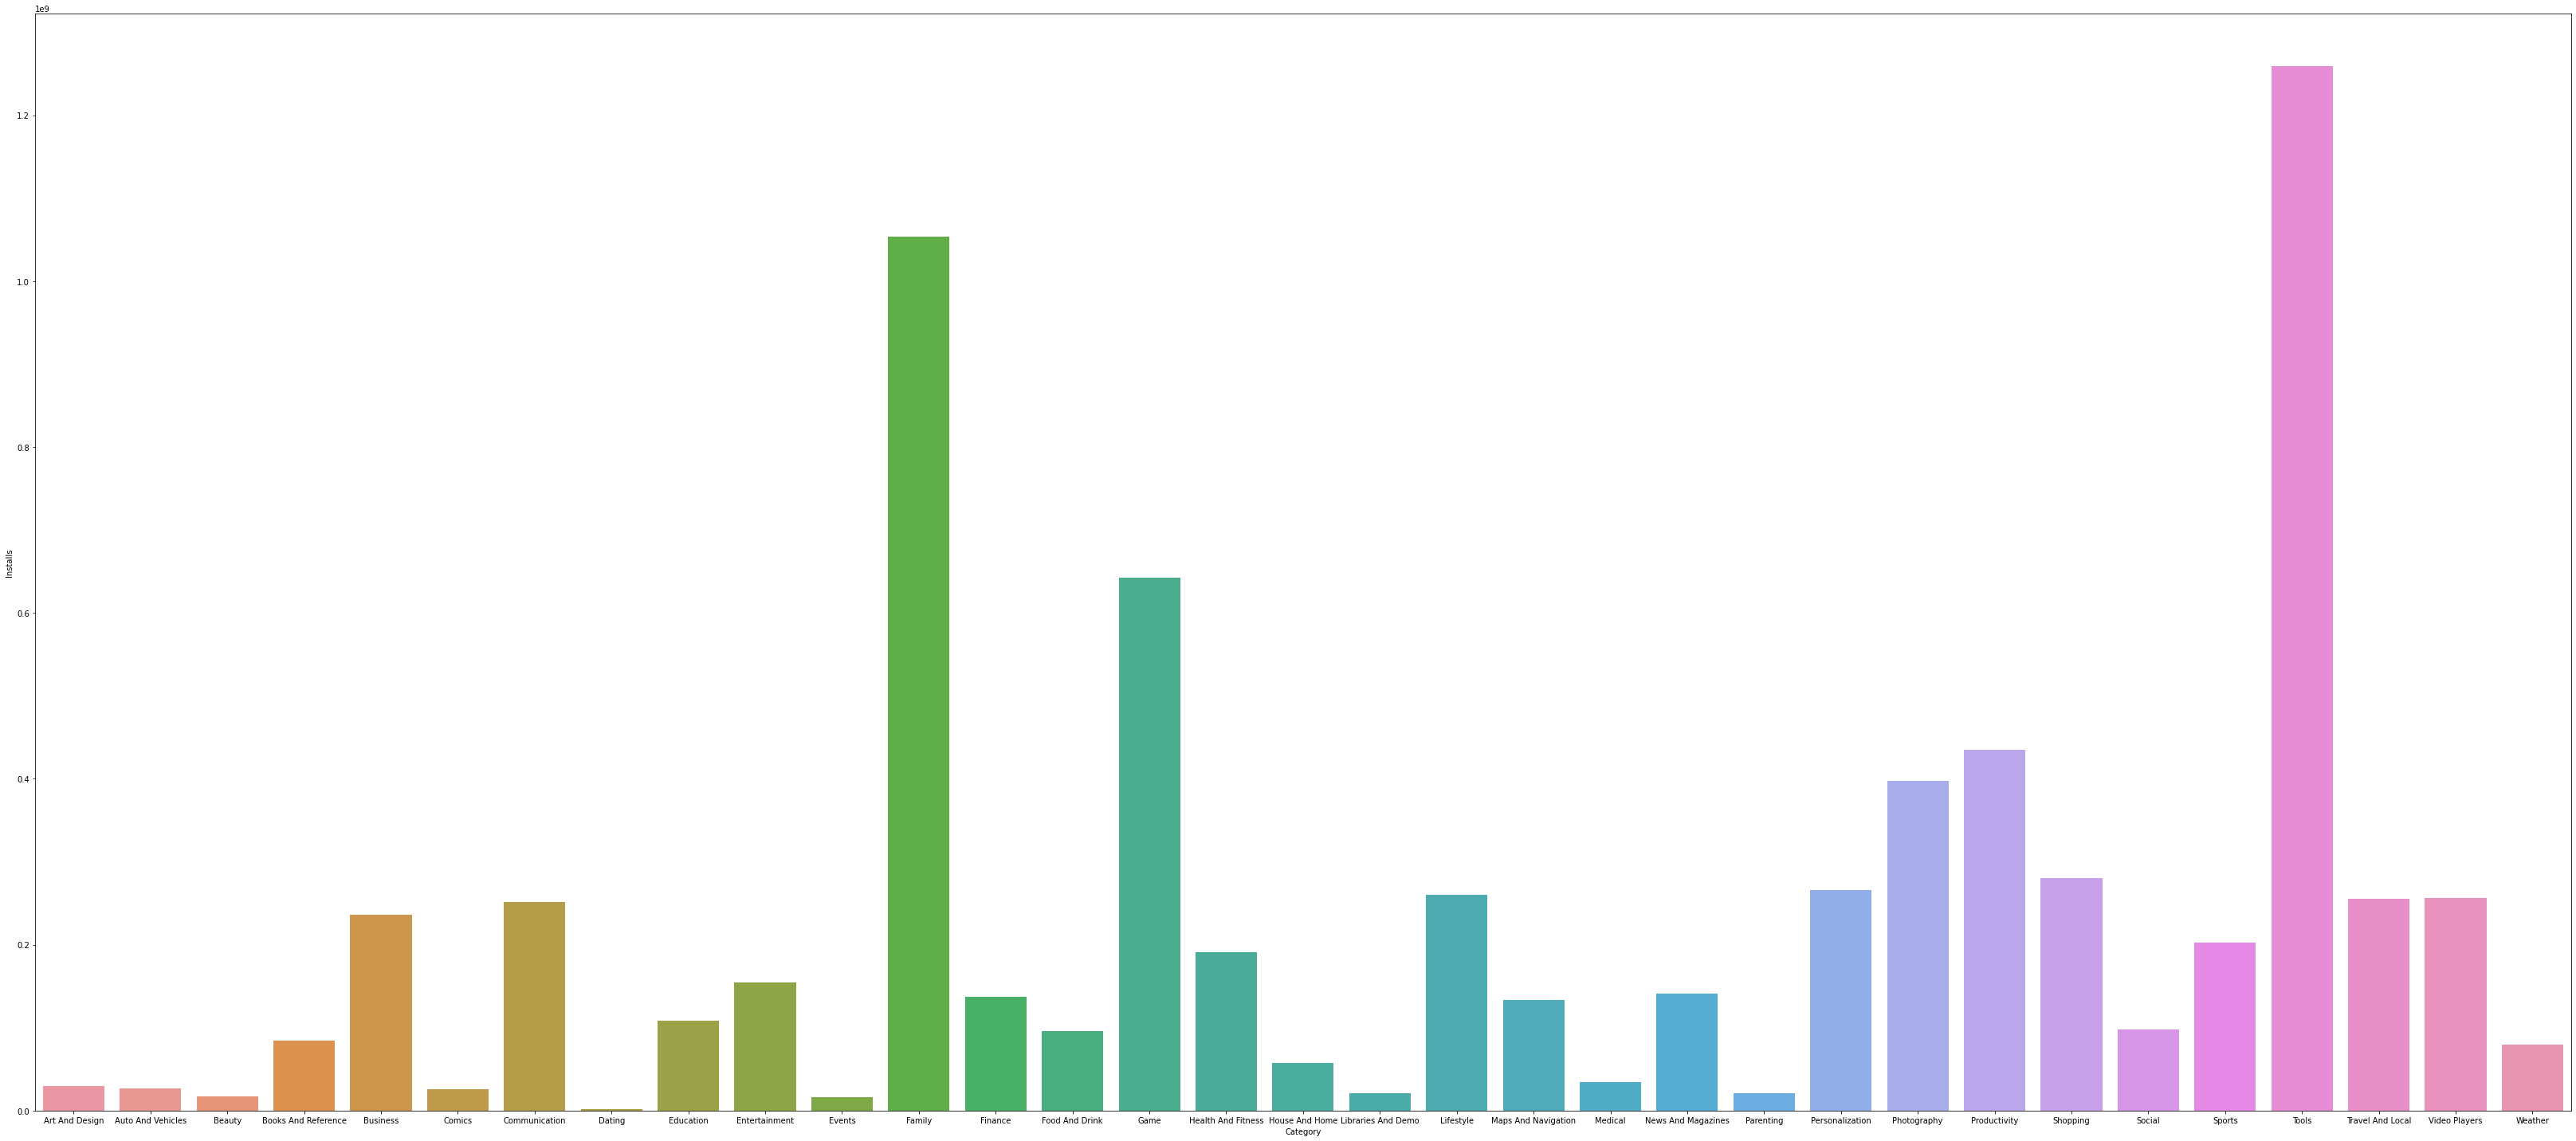

In [108]:
plt.figure(figsize = (45,20))
sns.barplot(df1['Category'],df1['Installs'])

plt.tight_layout()
plt.show()

**From This Graph between Category and Installs, we can conclude that people are installing more apps from these three categories Tools, Family, and Games**

In [109]:
df2 = Apps.groupby(['Rating']).sum()[['Installs']]
df2.reset_index(inplace=True)
df2

,Rating,Installs
0,1.0,5160
1,1.2,1000
2,1.4,7000
3,1.5,1105
4,1.6,152000
5,1.7,81700
6,1.8,519500
7,1.9,89000
8,2.0,5040150
9,2.1,182000


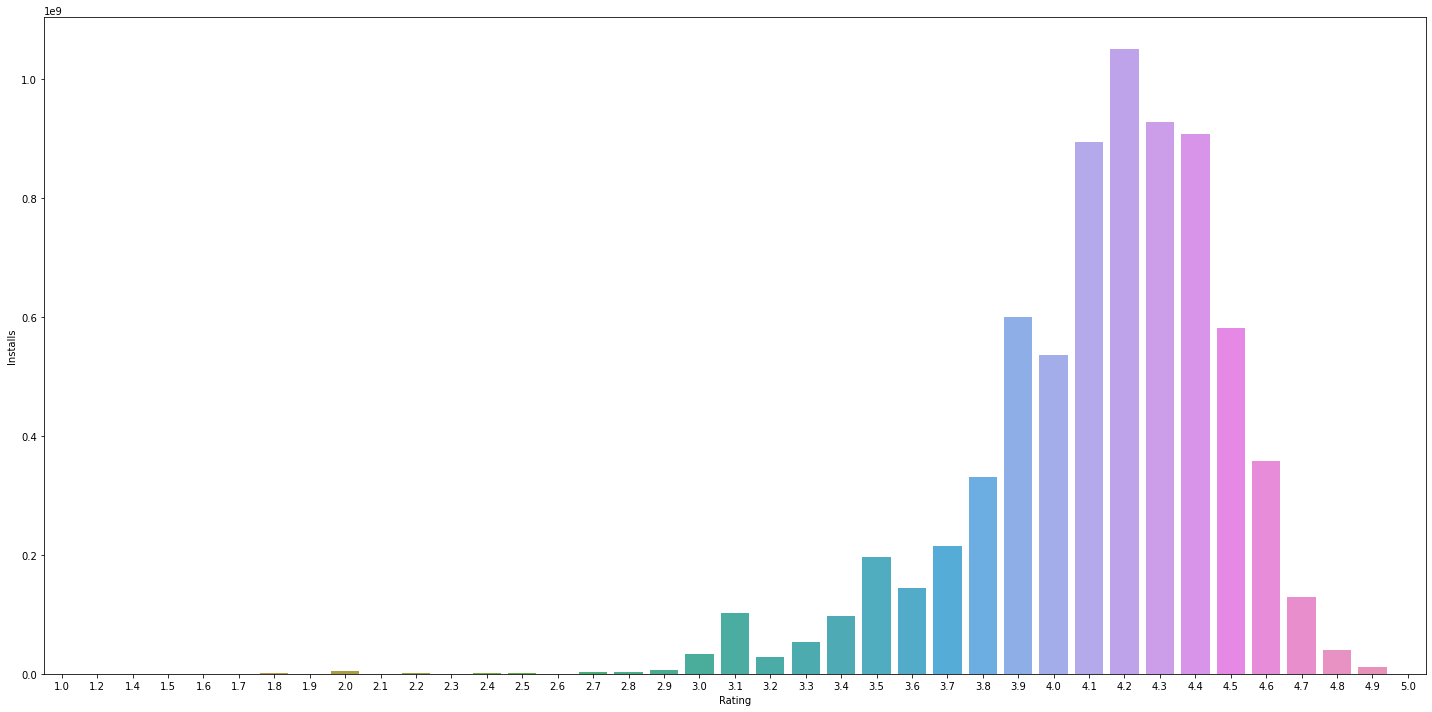

In [110]:
plt.figure(figsize = (20,10))
sns.barplot(df2['Rating'],df2['Installs'])

plt.tight_layout()
plt.show()

**From This Graph between Rating and Installs,we can conclude that people tends to Install more apps rated between 3.8 to 4.6**

In [111]:
df3 = Apps.groupby(['Category']).sum()[['Reviews']]
df3.reset_index(inplace=True)
df3

,Category,Reviews
0,Art And Design,315069.0
1,Auto And Vehicles,390940.0
2,Beauty,280945.0
3,Books And Reference,1434181.0
4,Business,2172968.0
5,Comics,458110.0
6,Communication,2568017.0
7,Dating,40467.0
8,Education,1939420.0
9,Entertainment,1739513.0


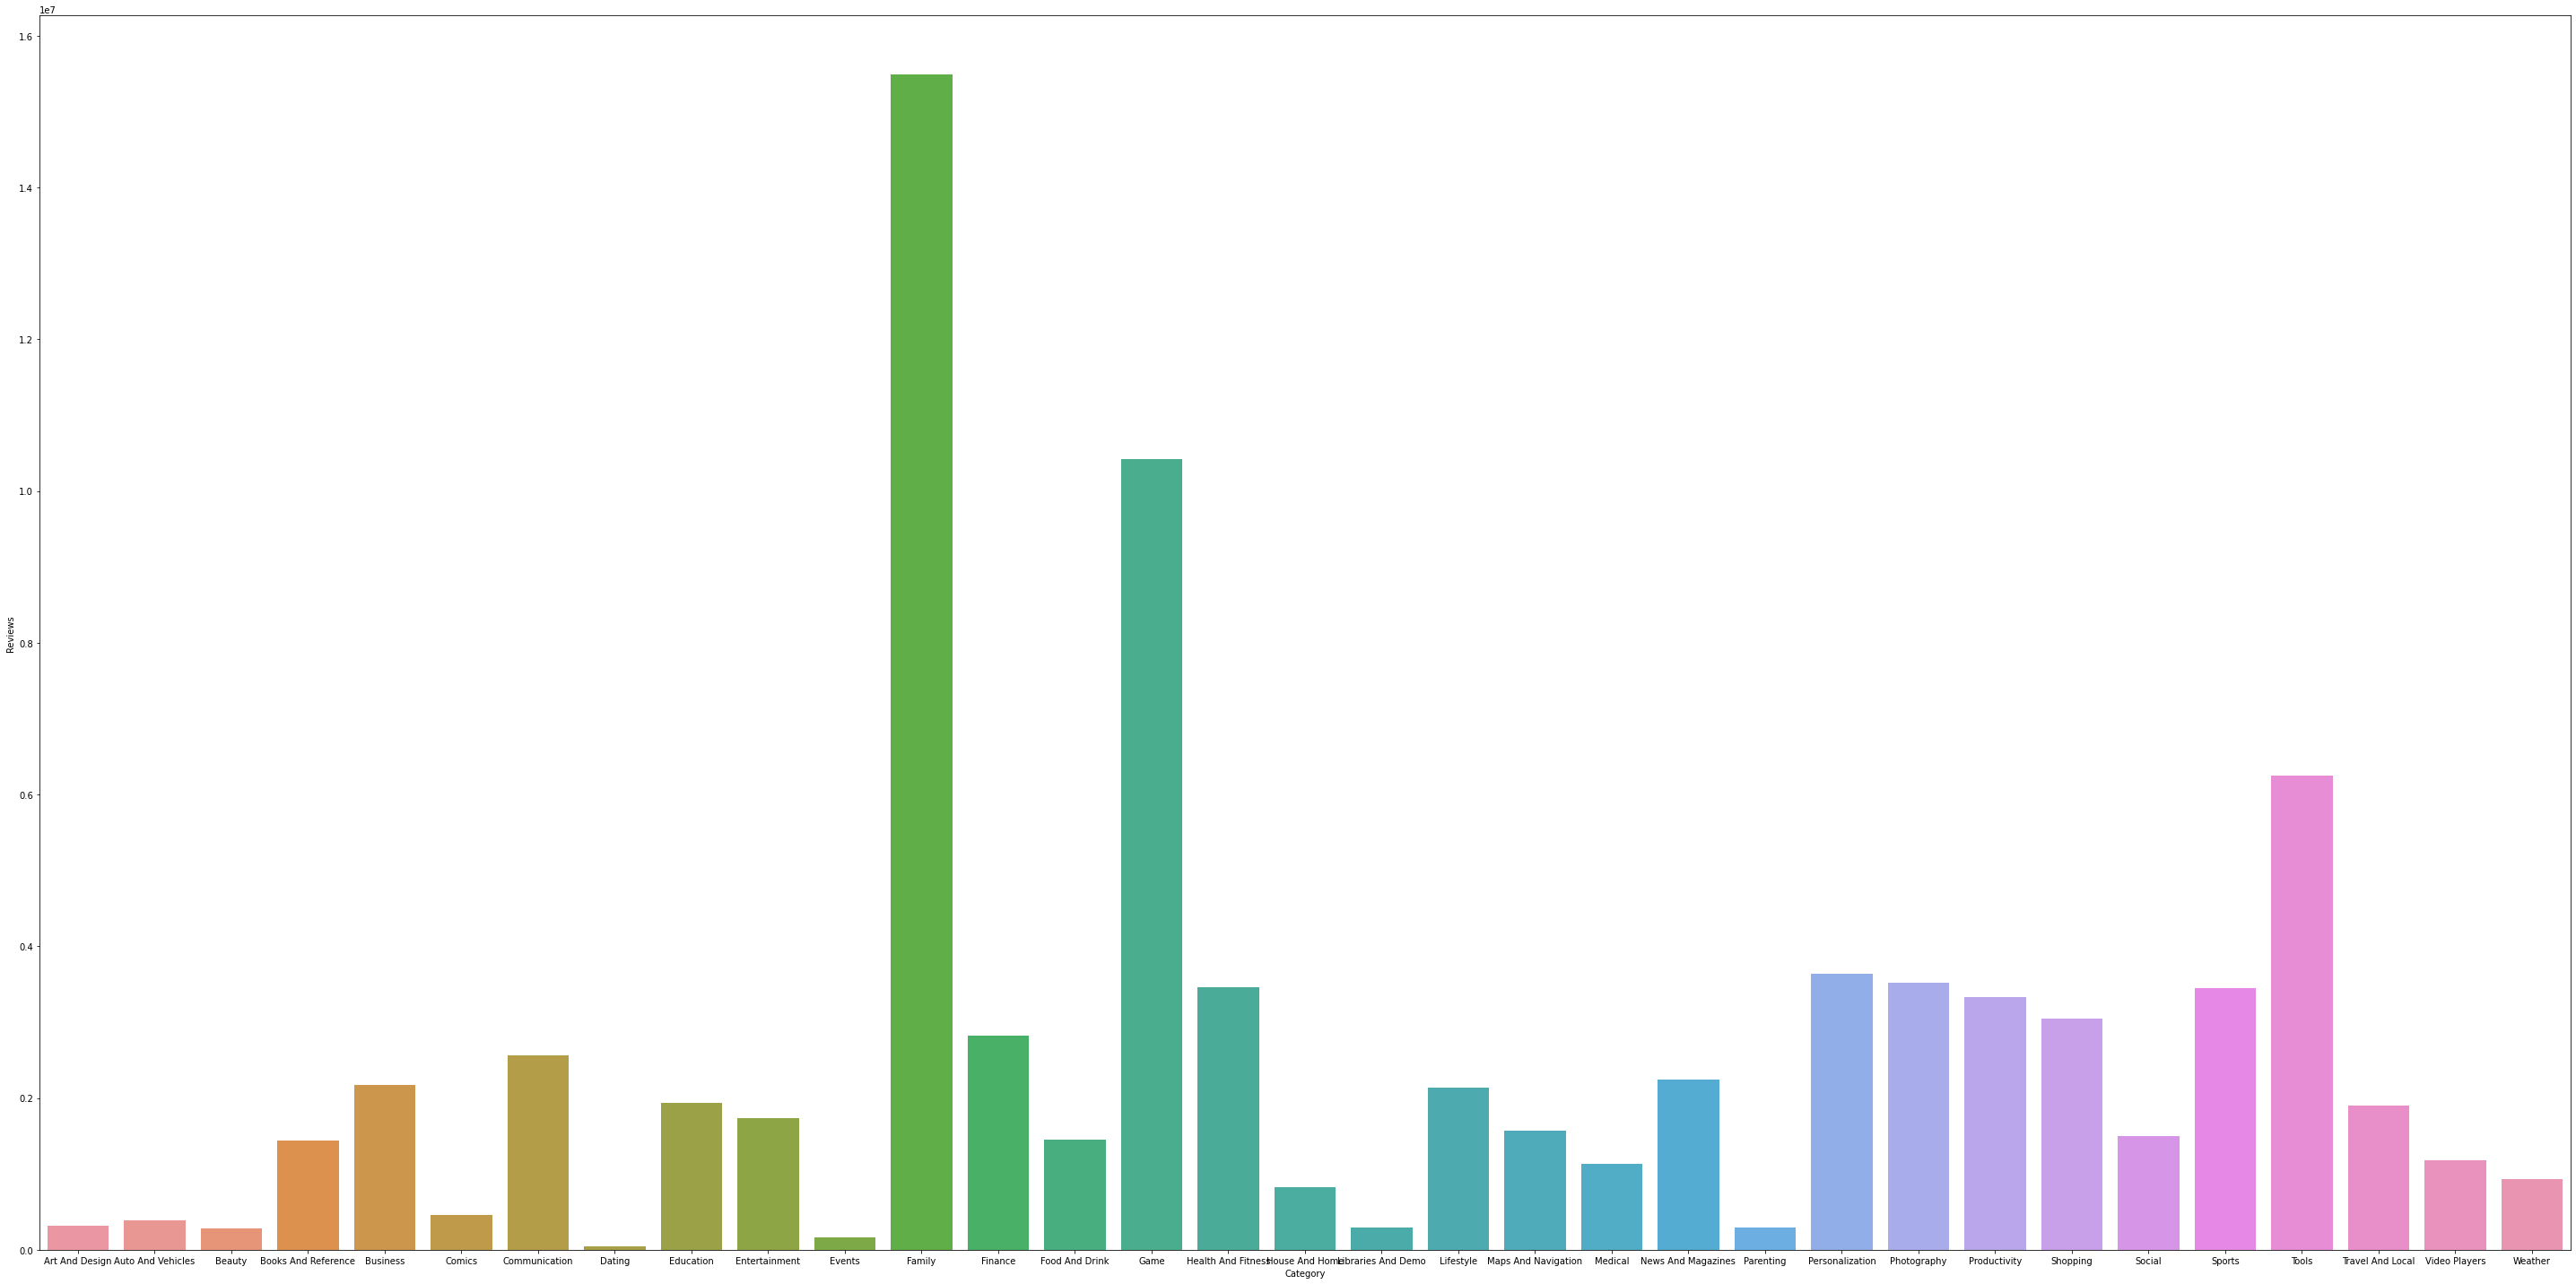

In [112]:
plt.figure(figsize = (40,20))
sns.barplot(df3['Category'],df3['Reviews'])

plt.tight_layout()
plt.show()

**From This Graph between Category and Reviews,we can conclude that that people are giving more Review in these three categories Tools, Family, and Games**